In [1]:
import pandas as pd
df=pd.read_csv("/content/final_processed_telegram_data.xls")
df

,sender_id,text,date,cleaned_text,sentiment_polarity,stock_mentions,stock_movement,sentiment_polarity_scaled,stock_mentions_scaled
0,1.885712e+09,Why does Eth even still exist? It's garbage. I...,2024-11-23 15:58:37+00:00,eth even still exist garbage slow gas fee absurd,-0.4,0,0,-2.087524,-0.241359
1,6.151136e+09,Then enlighten me 😅,2024-11-23 15:54:12+00:00,enlighten,0.0,0,1,-0.231611,-0.241359
2,1.066660e+09,NaN,2024-11-23 15:51:22+00:00,NaN,0.0,0,1,-0.231611,-0.241359
3,1.606224e+09,What about doge?,2024-11-23 15:32:16+00:00,doge,0.0,0,0,-0.231611,-0.241359
4,1.318408e+09,NaN,2024-11-23 15:31:12+00:00,NaN,0.0,0,0,-0.231611,-0.241359
...,...,...,...,...,...,...,...,...,...
495,5.893880e+09,Quantity Funds launches STKD Bitcoin & Gold ET...,2024-10-16 21:47:33+00:00,quantity fund launch stkd bitcoin gold etf exp...,0.0,0,1,-0.231611,-0.241359
496,8.745426e+08,Now is the time of dengy,2024-10-16 19:15:18+00:00,time dengy,0.0,0,0,-0.231611,-0.241359
497,8.745426e+08,Kkkk,2024-10-16 19:15:09+00:00,kkkk,0.0,0,1,-0.231611,-0.241359
498,8.014960e+09,pamp it gg,2024-10-16 19:04:26+00:00,pamp gg,0.0,0,1,-0.231611,-0.241359


In [8]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [9]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group by date and calculate metrics
daily_trends = df.groupby(df['date'].dt.date).agg(
    total_messages=('cleaned_text', 'count'),
    avg_sentiment=('sentiment_polarity', 'mean'),
    total_stock_mentions=('stock_mentions', 'sum')
).reset_index()

# Save daily trends data
daily_trends.to_csv('daily_trends.csv', index=False)

# Display the daily trends
print(daily_trends.head())


         date  total_messages  avg_sentiment  total_stock_mentions
0  2024-10-16               6   8.333333e-03                     0
1  2024-10-17               7  -1.541976e-18                     0
2  2024-10-18               5   2.857143e-03                     0
3  2024-10-19               2  -7.916667e-02                     0
4  2024-10-21               3   0.000000e+00                     0


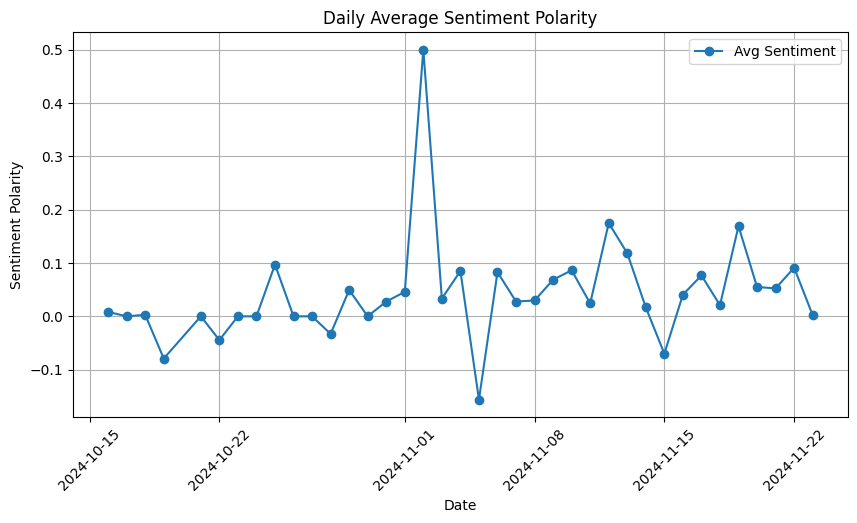

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(daily_trends['date'], daily_trends['avg_sentiment'], marker='o', label='Avg Sentiment')
plt.title('Daily Average Sentiment Polarity')
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


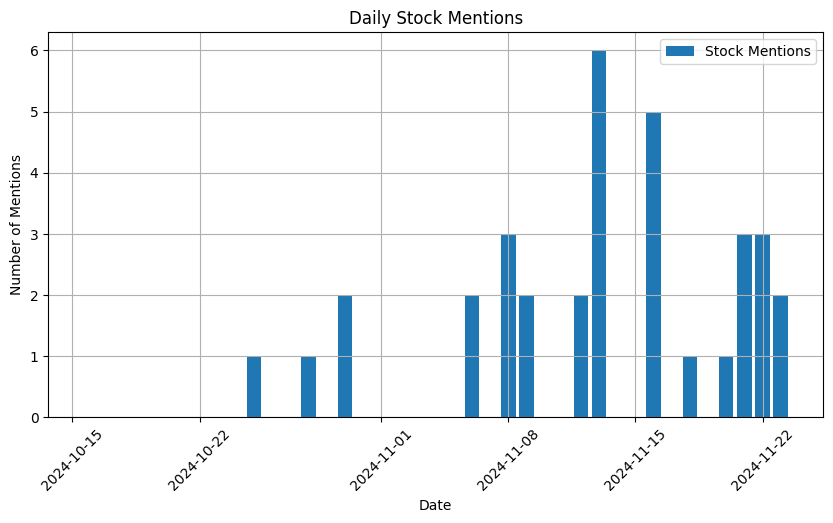

In [12]:
plt.figure(figsize=(10, 5))
plt.bar(daily_trends['date'], daily_trends['total_stock_mentions'], label='Stock Mentions')
plt.title('Daily Stock Mentions')
plt.xlabel('Date')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the cleaned text
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
text_matrix = vectorizer.fit_transform(df['cleaned_text'].dropna())

# Perform LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(text_matrix)

# Display top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)


Topic 1:
http link like bitfinex trade pro unfolded tl dr crypto
Topic 2:
lol say xrp think trump know year pentoshi oh way
Topic 3:
unfolded http time link bitcoin coinbase new high hold pepe
Topic 4:
bot long buy better going dapps fuck eth coin telegram
Topic 5:
btc doge like coinbase getting good na guy short look


In [14]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler



# Step 3: Feature Engineering
# Assuming 'stock_movement' is the label (binary: 1 for increase, 0 for decrease)
X = df[['sentiment_polarity', "stock_mentions"]]  # Features
y = df['stock_movement']  # Label

# Standardize features (important for many ML algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Build the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 6: Train the Model
model.fit(X_train, y_train)

# Step 7: Predict on the test data
y_pred = model.predict(X_test)

# Step 8: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print key evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')



Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.80      0.58        46
           1       0.53      0.19      0.27        54

    accuracy                           0.47       100
   macro avg       0.49      0.49      0.43       100
weighted avg       0.49      0.47      0.42       100

Accuracy: 0.4700
Precision: 0.5263
Recall: 0.1852
F1 Score: 0.2740
